# 6.1 Working with text data

Text is one of the most widespread forms of sequence data. It can be understood as
either a sequence of characters or a sequence of words, but it’s most common to work
at the level of words. The deep-learning sequence-processing models introduced in
the following sections can use text to produce a basic form of natural-language understanding, sufficient for applications including document classification, sentiment
analysis, author identification, and even question-answering (QA) (in a constrained
context). Of course, keep in mind throughout this chapter that none of these deeplearning models truly understand text in a human sense; rather, these models can
map the statistical structure of written language, which is sufficient to solve many simple textual tasks. Deep learning for natural-language processing is pattern recognition
applied to words, sentences, and paragraphs, in much the same way that computer
vision is pattern recognition applied to pixels.

Like all other neural networks, deep-learning models don’t take as input raw text:
they only work with numeric tensors. *Vectorizing* text is the process of transforming text
into numeric tensors. This can be done in multiple ways:
- Segment text into words, and transform each word into a vector.
- Segment text into characters, and transform each character into a vector.
- Extract n-grams of words or characters, and transform each n-gram into a vector. *N-grams* are overlapping groups of multiple consecutive words or characters.

Collectively, the different units into which you can break down text (words, characters, or n-grams) are called *tokens*, and breaking text into such tokens is called *tokenization*. All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens. These vectors, packed
into sequence tensors, are fed into deep neural networks. There are multiple ways to
associate a vector with a token. In this section, I’ll present two major ones: **one-hot
encoding** of tokens, and **token embedding** (typically used exclusively for words, and called
**word embedding**). The remainder of this section explains these techniques and shows
how to use them to go from raw text to a Numpy tensor that you can send to a Keras
network.

## 6.1.1 One-hot encoding of words and characters

One-hot encoding is the most common, most basic way to turn a token into a vector.
You saw it in action in the initial IMDB and Reuters examples in chapter 3 (done with
words, in that case). It consists of associating a unique integer index with every word
and then turning this integer index *i* into a binary vector of size *N* (the size of the
vocabulary); the vector is all zeros except for the *i*th entry, which is 1.
 Of course, one-hot encoding can be done at the character level, as well. To unambiguously drive home what one-hot encoding is and how to implement it, there are two toy examples below: one for words, the other for characters.
 
### *Word-level one-hot encoding (toy example)*

In [1]:
import numpy as np

# Initial data: one entry per example (in this example, a sample is a sentence, but it could be an entire document)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Builds an index of all tokens in the data
token_index = {}
for sample in samples:
    # Tokenizes the samples via split method. In real life, you'd also strip punctuation and special characters from samples.
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word. Note that you don't attribute index 0 to anything.
            token_index[word] = len(token_index) + 1
            
# Vectorizes the samples. You'll only consider the first max_length words in each sample.
max_length = 10

# This is where you store the results.
results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
        
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### *Character-level one-hot encoding (toy example)*

In [2]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# All printable ASCII characters
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        # print(character, "is at index", index)
        results[i, j, index] = 1.

Note that Keras has built-in utilities for doing one-hot encoding of text at the word level
or character level, starting from raw text data. You should use these utilities, because
they take care of a number of important features such as stripping special characters
from strings and only taking into account the *N* most common words in your dataset (a
common restriction, to avoid dealing with very large input vector spaces).

### *Using Keras for word-level one-hot encoding*

In [4]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Creates a tokenizer, configured to only take into account the 1000 most common words
tokenizer = Tokenizer(num_words=1000)

# Builds the word index
tokenizer.fit_on_texts(samples)

In [5]:
# Turns strings into lists of integers indices
sequences = tokenizer.texts_to_sequences(samples)

sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [6]:
# You could also directly get the one-hot binary representations. 
# Vectorization modes other than one-hot encoding are supported by this tokenizer.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

one_hot_results.shape

(2, 1000)

In [7]:
# How you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


A variant of one-hot encoding is the so-called *one-hot hashing trick*, which you can use
when the number of unique tokens in your vocabulary is too large to handle explicitly.
Instead of explicitly assigning an index to each word and keeping a reference of these
indices in a dictionary, you can hash words into vectors of fixed size. This is typically
done with a very lightweight hashing function. The main advantage of this method is
that it does away with maintaining an explicit word index, which saves memory and
allows online encoding of the data (you can generate token vectors right away, before
you’ve seen all of the available data). The one drawback of this approach is that it’s
susceptible to *hash collisions*: two different words may end up with the same hash, and
subsequently any machine-learning model looking at these hashes won’t be able to tell
the difference between these words. The likelihood of hash collisions decreases when
the dimensionality of the hashing space is much larger than the total number of
unique tokens being hashed.

### *Word-level one-hot encoding with hashing trick (toy example)* 

In [8]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Stores the words as vectors of size 1,000. If you have close to 1,000 words (or more), you’ll see many hash collisions,
# which will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hashes the word into a random integer index between 0 and 1,000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

## 6.1.2 Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense
*word vectors*, also called *word embeddings*. Whereas the vectors obtained through one-hot
encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same
dimensionality as the number of words in the vocabulary), word embeddings are lowdimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors); see figure 6.2. Unlike the word vectors obtained via one-hot encoding, word
embeddings are learned from data. It’s common to see word embeddings that are
256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large
vocabularies. On the other hand, one-hot encoding words generally leads to vectors
that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in
this case). So, word embeddings pack more information into far fewer dimensions.

<img src="https://drek4537l1klr.cloudfront.net/allaire/Figures/06fig02.jpg" 
     align="center" 
     width="300" />
     
There are two ways to obtain word embeddings:
- Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the
weights of a neural network.
- Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying to solve. These are called *pretrained word embeddings*.

Let’s look at both.

## Learning word embeddings with the embedding layer

The simplest way to associate a dense vector with a word is to choose the vector at
random. The problem with this approach is that the resulting embedding space has
no structure: for instance, the words "accurate" and "exact" may end up with completely
different embeddings, even though they’re interchangeable in most sentences. It’s
difficult for a deep neural network to make sense of such a noisy, unstructured
embedding space.

 To get a bit more abstract, the geometric relationships between word vectors
should reflect the semantic relationships between these words. Word embeddings are
meant to map human language into a geometric space. For instance, in a reasonable
embedding space, you would expect synonyms to be embedded into similar word vectors; and in general, you would expect the geometric distance (such as L2 distance)
between any two word vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away from
each other, whereas related words are closer). In addition to distance, you may want
specific *directions* in the embedding space to be meaningful. 

In real-world word-embedding spaces, common examples of meaningful geometric transformations are “gender”
vectors and “plural” vectors. For instance, by adding a “female” vector to the vector
“king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.”
Word-embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

 Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural-language-processing task? Possibly, but we
have yet to compute anything of the sort. Also, there is no such a thing as *human language*—there are many different languages, and they aren’t isomorphic, because a language is the reflection of a specific culture and a specific context. But more
pragmatically, what makes a good word-embedding space depends heavily on your task:
the perfect word-embedding space for an English-language movie-review sentimentanalysis model may look different from the perfect embedding space for an Englishlanguage legal-document-classification model, because the importance of certain
semantic relationships varies from task to task.

It’s thus reasonable to *learn* a new embedding space with every new task. Fortunately, backpropagation makes this easy, and Keras makes it even easier. It’s about
learning the weights of a layer: the `Embedding` layer.

### *Instantiating an `Embedding` layer*

The `Embedding` layer takes at least two arguments: the number of possible tokens (here, 1000: 1 + maximum word index) and the dimensionality of the embeddings (here, 64).

In [9]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

The `Embedding` layer is best understood as a dictionary that maps integer indices
(which stand for specific words) to dense vectors. It takes integers as input, it looks up
these integers in an internal dictionary, and it returns the associated vectors. It’s effectively a dictionary lookup.

The `Embedding` layer takes as input a 2D tensor of integers, of shape `(samples,
sequence_length)`, where each entry is a sequence of integers. It can embed
sequences of variable lengths: for instance, you could feed into the `Embedding` layer in
the previous example batches with shapes `(32, 10)` (batch of 32 sequences of length 10) or `(64, 15)` (batch of 64 sequences of length 15). All sequences in a batch must
have the same length, though (because you need to pack them into a single tensor),
so sequences that are shorter than others should be padded with zeros, and sequences
that are longer should be truncated.

 This layer returns a 3D floating-point tensor of shape `(samples, sequence_
length, embedding_dimensionality)`. Such a 3D tensor can then be processed by
an RNN layer or a 1D convolution layer (both will be introduced in the following
sections).

When you instantiate an `Embedding` layer, its weights (its internal dictionary of
token vectors) are initially random, just as with any other layer. During training, these
word vectors are gradually adjusted via backpropagation, structuring the space into
something the downstream model can exploit. Once fully trained, the embedding
space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

 Let’s apply this idea to the IMDB movie-review sentiment-prediction task that
you’re already familiar with. First, you’ll quickly prepare the data. You’ll restrict the
movie reviews to the top 10,000 most common words (as you did the first time you
worked with this dataset) and cut off the reviews after only 20 words. The network will
learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the
tensor to 2D, and train a single Dense layer on top for classification.

### *Loading the IMDB data for use with an `Embedding` layer*

In [10]:
from keras.datasets import imdb
from keras.utils import pad_sequences

# Number of words to consider as features
max_features = 10000

# Cuts off the text after this number of words (among the max_features most common words)
maxlen = 20

# Loads data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


### *Using an `Embedding` layer and classifier on the IMDB data*

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs. 
# After the Embedding layer, the activations have shape (samples, maxlen, 8).
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

# Adds the classifier on top
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 16s 19ms/step - loss: 0.6729 - acc: 0.6163 - val_loss: 0.6283 - val_acc: 0.6920
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5535 - acc: 0.7466 - val_loss: 0.5316 - val_acc: 0.7262
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4696 - acc: 0.7843 - val_loss: 0.5040 - val_acc: 0.7396
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4291 - acc: 0.8043 - val_loss: 0.4960 - val_acc: 0.7486
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4013 - acc: 0.8201 - val_loss: 0.4939 - val_acc: 0.7508
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3784 - acc: 0.8342 - val_loss: 0.4959 - val_acc: 0.7558
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3579 - acc: 0.8468 - val_loss: 0.5032 - val_acc: 0.7542
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 

You get to a validation accuracy of ~75%, which is pretty good considering that you’re
only looking at the first 20 words in every review. But note that merely flattening the
embedded sequences and training a single `Dense` layer on top leads to a model that
treats each word in the input sequence separately, without considering inter-word
relationships and sentence structure (for example, this model would likely treat both
“this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s
much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.
That’s what we’ll focus on in the next few sections. 

## Using pretrained word embeddings
Sometimes, you have so little training data available that you can’t use your data
alone to learn an appropriate task-specific embedding of your vocabulary. What do
you do then?

Instead of learning word embeddings jointly with the problem you want to solve,
you can load embedding vectors from a precomputed embedding space that you
know is highly structured and exhibits useful properties—that captures generic
aspects of language structure. The rationale behind using pretrained word embeddings in natural-language processing is much the same as for using pretrained convnets in image classification: you don’t have enough data available to learn truly
powerful features on your own, but you expect the features that you need to be fairly
generic—that is, common visual features or semantic features. In this case, it makes
sense to reuse features learned on a different problem.

 Such word embeddings are generally computed using *word-occurrence statistics*
(observations about what words co-occur in sentences or documents), using a variety of
techniques, some involving neural networks, others not. The idea of a dense, lowdimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s (see Yoshua Bengio et al., Neural Probabilistic Language Models (Springer, 2003)),
 but it only started to take off in
research and industry applications after the release of one of the most famous and successful word-embedding schemes: the Word2vec algorithm (https://code.google.com/archive/p/word2vec), developed by Tomas Mikolov at Google in 2013. Word2vec
dimensions capture specific semantic properties, such as gender.

 There are various precomputed databases of word embeddings that you can download and use in a Keras `Embedding` layer. Word2vec is one of them. Another popular
one is called Global Vectors for Word Representation (GloVe, https://nlp.stanford
.edu/projects/glove), which was developed by Stanford researchers in 2014. This
embedding technique is based on factorizing a matrix of word co-occurrence statistics. Its developers have made available precomputed embeddings for millions of
English tokens, obtained from Wikipedia data and Common Crawl data.

 Let’s look at how you can get started using GloVe embeddings in a Keras model.
The same method is valid for Word2vec embeddings or any other word-embedding
database. You’ll also use this example to refresh the text-tokenization techniques
introduced a few paragraphs ago: you’ll start from raw text and work your way up. 

## 6.1.3 Putting it all together: from raw text to word embeddings

You’ll use a model similar to the one we just went over: embedding sentences in
sequences of vectors, flattening them, and training a `Dense` layer on top. But you’ll do
so using pretrained word embeddings; and instead of using the pretokenized IMDB
data packaged in Keras, you’ll start from scratch by downloading the original text data.

First, head to http://mng.bz/0tIo and download and unzip the raw IMDB dataset, or you can find it on Kaggle. Now, let’s collect the individual training reviews into a list of strings, one string per review. You’ll also collect the review labels (positive/negative) into a labels list. 

### *Processing the labels of the raw IMDB data*

In [13]:
import os

imdb_dir = '/kaggle/input/aclimdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Let’s vectorize the text and prepare a training and validation split, using the concepts
introduced earlier in this section. Because pretrained word embeddings are meant to
be particularly useful on problems where little training data is available (otherwise,
task-specific embeddings are likely to outperform them), we’ll add the following twist:
restricting the training data to the first 200 samples. So you’ll learn to classify movie
reviews after looking at just 200 examples.

### *Tokenizing the text of the raw IMDB data*

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# Cuts off reviews after 100 words
maxlen = 100
# Trains on 200 samples
training_samples = 200
# Validates on 10000 samples
validation_samples = 10000
# Considers only the top 10000 words in the dataset
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


Next, you split the data into a training set and a
validation set, but first shuffles the data,
because you’re starting with data in which
samples are ordered (all negative first, then
all positive).

In [17]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

### *Parsing the GloVe word-embeddings file*

Go to https://nlp.stanford.edu/projects/glove, and download the precomputed
embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip,
containing 100-dimensional embedding vectors for 400,000 words (or nonword
tokens). Unzip it. 

Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings)
to their vector representation (as number vectors).

In [20]:
glove_dir = '/kaggle/input/glove6b100dtxt'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next, you’ll build an embedding matrix that you can load into an `Embedding` layer. It
must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the `embedding_dim`-dimensional vector for the word of index *i* in the reference word
index (built during tokenization). Note that index 0 isn’t supposed to stand for any
word or token—it’s a placeholder.

### *Preparing the GloVe word-embeddings matrix*

In [23]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### *Model definition*

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### *Loading pretrained word embeddings into the `Embedding` layer*

The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry i is
the word vector meant to be associated with index i. Simple enough. Load the GloVe
matrix you prepared into the `Embedding` layer, the first layer in the model.

In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Additionally, you’ll freeze the `Embedding` layer (set its trainable attribute to `False`),
following the same rationale you’re already familiar with in the context of pretrained
convnet features: when parts of a model are pretrained (like your `Embedding` layer)
and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t
be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the
already-learned features.

### *Training and evaluation*

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 122ms/step - loss: 1.8859 - acc: 0.4750 - val_loss: 0.6932 - val_acc: 0.5032
Epoch 2/10
7/7 [==============================] - 1s 110ms/step - loss: 0.6435 - acc: 0.6150 - val_loss: 0.9962 - val_acc: 0.5054
Epoch 3/10
7/7 [==============================] - 1s 110ms/step - loss: 0.6651 - acc: 0.6400 - val_loss: 1.1002 - val_acc: 0.4956
Epoch 4/10
7/7 [==============================] - 1s 110ms/step - loss: 0.4236 - acc: 0.8000 - val_loss: 2.1884 - val_acc: 0.4946
Epoch 5/10
7/7 [==============================] - 1s 103ms/step - loss: 0.4764 - acc: 0.8500 - val_loss: 1.4261 - val_acc: 0.5054
Epoch 6/10
7/7 [==============================] - 1s 110ms/step - loss: 0.3217 - acc: 0.8550 - val_loss: 0.9402 - val_acc: 0.5187
Epoch 7/10
7/7 [==============================] - 1s 110ms/step - loss: 0.1354 - acc: 0.9700 - val_loss: 0.7673 - val_acc: 0.5589
Epoch 8/10
7/7 [==============================] - 1s 98ms/step - loss: 0.0805 - acc: 0.995

### *Plotting the results*

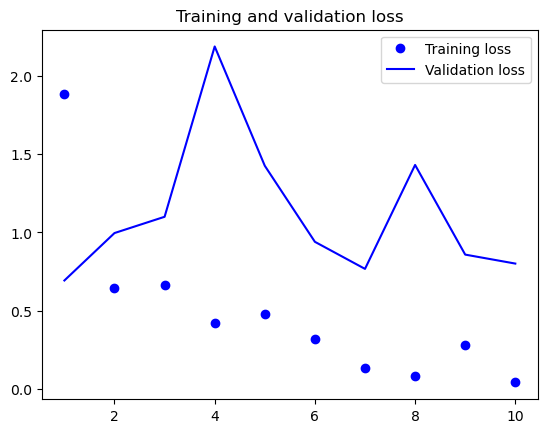

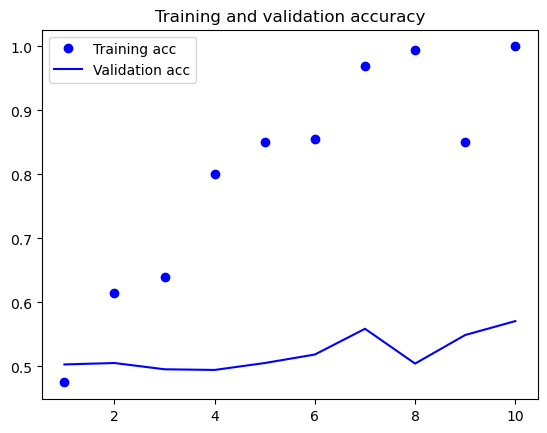

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of
training samples. Validation accuracy has high variance for the same reason, but it
seems to reach the high 50s.
 Note that your mileage may vary: because you have so few training samples, performance is heavily dependent on exactly which 200 samples you choose—and you’re
choosing them at random. If this works poorly for you, try choosing a different random set of 200 samples, for the sake of the exercise (in real life, you don’t get to
choose your training data).
 You can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, you’ll learn a taskspecific embedding of the input tokens, which is generally more powerful than
pretrained word embeddings when lots of data is available. But in this case, you have
only 200 training samples. Let’s try it.

### *Training the same model without pretrained word embeddings*

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 3s 276ms/step - loss: 0.6939 - acc: 0.4900 - val_loss: 0.6928 - val_acc: 0.5080
Epoch 2/10
7/7 [==============================

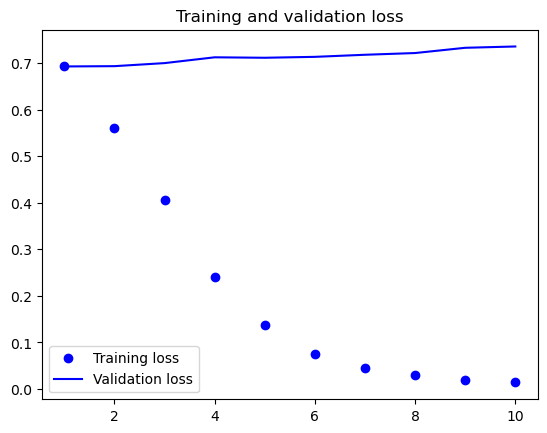

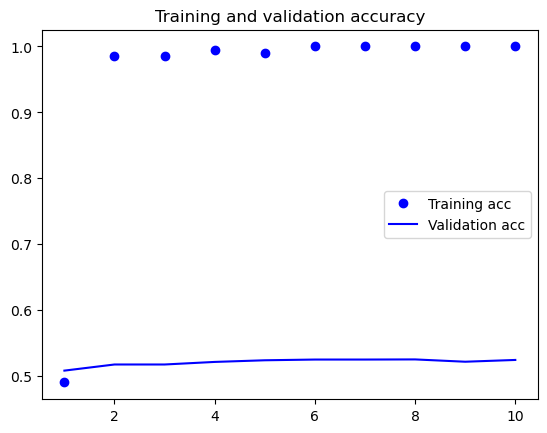

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings
outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case—try it as an exercise.
 Finally, let’s evaluate the model on the test data. First, you need to tokenize the test
data.

### *Tokenizing the data of the test set*

In [34]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

### *Evaluating the model on the test set*

In [35]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8151 - acc: 0.5631


[0.8151290416717529, 0.5631200075149536]

You get an appalling test accuracy of 56%. Working with just a handful of training
samples is difficult!

## 6.4.1 Wrapping up

Now you’re able to do the following:
- Turn raw text into something a neural network can process
- Use the `Embedding` layer in a Keras model to learn task-specific token embeddings
- Use pretrained word embeddings to get an extra boost on small natural language-processing problems 